## https://dsstudy.tistory.com/10

In [2]:
import pandas as pd
import seaborn as sns
import FinanceDataReader as fdr

In [3]:
from bs4 import BeautifulSoup
import requests


###lg 화학 분석
if __name__ == '__main__':
    url = 'https://finance.naver.com/item/sise_day.nhn?code=051910&page=1'
    req = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text

    html = BeautifulSoup(req, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]

last_page
#마지막 페이지가 522


'522'

In [4]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=051910'

for page in range(1, int(last_page)+1) :
  page_url = '{}&page={}'.format(sise_url,page)
  df = df.append(pd.read_html(requests.get(page_url,headers={'User-agent': 'Mozilla/5.0'}).text)[0])
  
df = df.dropna()
df

C:\Users\ssoyeon\AppData\Local\Temp\ipykernel_18444\3774056908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(requests.get(page_url,headers={'User-agent': 'Mozilla/5.0'}).text)[0])
C:\Users\ssoyeon\AppData\Local\Temp\ipykernel_18444\3774056908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(requests.get(page_url,headers={'User-agent': 'Mozilla/5.0'}).text)[0])
C:\Users\ssoyeon\AppData\Local\Temp\ipykernel_18444\3774056908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(requests.get(page_url,headers={'User-agent': 'Mozilla/5.0'}).text)[0])
C:\Users\ssoyeon\AppData\Local\Temp\ipykernel_18444\3774056908.py:6: FutureWarning: The fra

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.05.25,534000.0,5000.0,549000.0,550000.0,534000.0,197901.0
2,2022.05.24,539000.0,4000.0,544000.0,551000.0,537000.0,198053.0
3,2022.05.23,543000.0,2000.0,547000.0,555000.0,538000.0,270359.0
4,2022.05.20,545000.0,43000.0,505000.0,546000.0,505000.0,531053.0
5,2022.05.19,502000.0,10000.0,495000.0,507000.0,495000.0,200969.0
...,...,...,...,...,...,...,...
11,2001.05.02,13000.0,200.0,12900.0,13250.0,12650.0,851580.0
12,2001.04.30,12800.0,100.0,12450.0,12850.0,12450.0,803230.0
13,2001.04.27,12700.0,300.0,12150.0,12800.0,12000.0,854340.0
1,2001.04.26,12400.0,600.0,12600.0,12950.0,12300.0,1197840.0


In [5]:
df.head(5)

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.05.25,534000.0,5000.0,549000.0,550000.0,534000.0,197901.0
2,2022.05.24,539000.0,4000.0,544000.0,551000.0,537000.0,198053.0
3,2022.05.23,543000.0,2000.0,547000.0,555000.0,538000.0,270359.0
4,2022.05.20,545000.0,43000.0,505000.0,546000.0,505000.0,531053.0
5,2022.05.19,502000.0,10000.0,495000.0,507000.0,495000.0,200969.0


In [6]:
df['날짜']= df['날짜'].astype('str')
df['날짜'] = pd.to_datetime(df['날짜'])
# pd.to_datetime(df['date'])
df['날짜']
df.set_index('날짜',inplace=True)
df = df.sort_values('날짜')
df

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2001-04-25,13000.0,0.0,14500.0,14500.0,12350.0,3094940.0
2001-04-26,12400.0,600.0,12600.0,12950.0,12300.0,1197840.0
2001-04-27,12700.0,300.0,12150.0,12800.0,12000.0,854340.0
2001-04-30,12800.0,100.0,12450.0,12850.0,12450.0,803230.0
2001-05-02,13000.0,200.0,12900.0,13250.0,12650.0,851580.0
...,...,...,...,...,...,...
2022-05-19,502000.0,10000.0,495000.0,507000.0,495000.0,200969.0
2022-05-20,545000.0,43000.0,505000.0,546000.0,505000.0,531053.0
2022-05-23,543000.0,2000.0,547000.0,555000.0,538000.0,270359.0


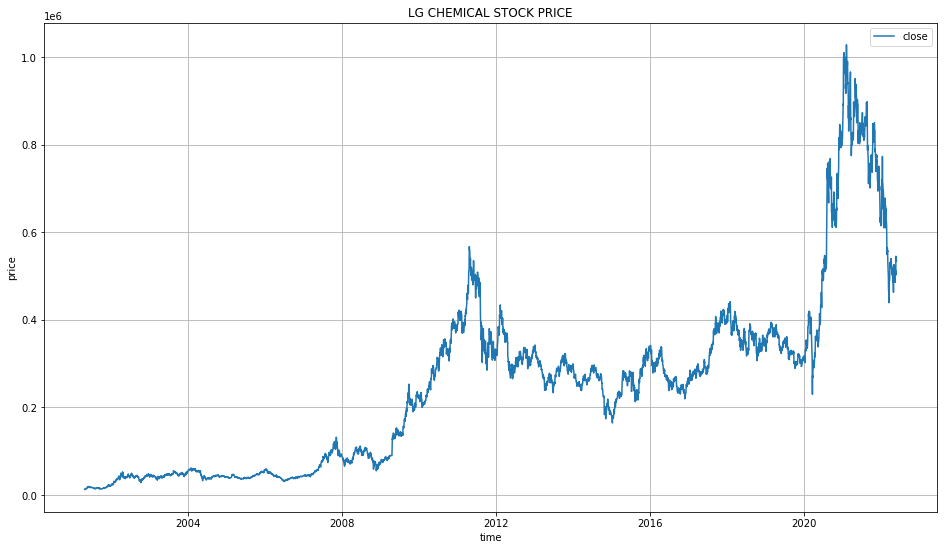

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))

plt.title("LG CHEMICAL STOCK PRICE")
sns.lineplot(y=df['종가'], x=df.index, label = "close")
plt.xlabel('time')
plt.ylabel('price')
plt.grid()
plt.show()


In [8]:
df.isnull().sum()

종가     0
전일비    0
시가     0
고가     0
저가     0
거래량    0
dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_cols = ['시가','고가','저가','종가','거래량']
scaled_df = scaler.fit_transform(df[scale_cols])
#fit_transform 함수는 넘파이를 리턴
scaled_df = pd.DataFrame(scaled_df, columns = scale_cols)
#정규화된 새로운 dataframe 생성시켜야함

scaled_df


,시가,고가,저가,종가,거래량
0,0.014258,0.013810,0.012289,0.000591,0.775494
1,0.012389,0.012333,0.012239,0.000000,0.300141
2,0.011947,0.012190,0.011940,0.000295,0.214071
3,0.012242,0.012238,0.012388,0.000394,0.201264
4,0.012684,0.012619,0.012587,0.000591,0.213379
...,...,...,...,...,...
5207,0.486726,0.482857,0.492537,0.482080,0.050356
5208,0.496559,0.520000,0.502488,0.524419,0.133065
5209,0.537856,0.528571,0.535323,0.522450,0.067743
5210,0.534907,0.524762,0.534328,0.518511,0.049626


In [10]:
window_size = 20
TEST_SIZE = 200

In [11]:
train = scaled_df[:-TEST_SIZE]
test = scaled_df[-TEST_SIZE:]

##200일의 데이터를 얼마나 잘 예측하느냐

In [12]:
train

,시가,고가,저가,종가,거래량
0,0.014258,0.013810,0.012289,0.000591,0.775494
1,0.012389,0.012333,0.012239,0.000000,0.300141
2,0.011947,0.012190,0.011940,0.000295,0.214071
3,0.012242,0.012238,0.012388,0.000394,0.201264
4,0.012684,0.012619,0.012587,0.000591,0.213379
...,...,...,...,...,...
5007,0.813176,0.787619,0.810945,0.792241,0.045811
5008,0.813176,0.797143,0.818905,0.809965,0.081757
5009,0.817109,0.796190,0.822886,0.809965,0.063189
5010,0.828909,0.802857,0.826866,0.809965,0.035640


In [13]:
test

,시가,고가,저가,종가,거래량
5012,0.833825,0.823810,0.825871,0.838519,0.078766
5013,0.857424,0.830476,0.845771,0.827688,0.056298
5014,0.831858,0.820952,0.827861,0.830642,0.057115
5015,0.834808,0.820952,0.840796,0.831627,0.057132
5016,0.844641,0.819048,0.836816,0.816857,0.045395
...,...,...,...,...,...
5207,0.486726,0.482857,0.492537,0.482080,0.050356
5208,0.496559,0.520000,0.502488,0.524419,0.133065
5209,0.537856,0.528571,0.535323,0.522450,0.067743
5210,0.534907,0.524762,0.534328,0.518511,0.049626


In [14]:
#데이터셋을 만들어 주는 함수
import numpy as np

def make_dataset(feature, label, window_size=20):
  
    feature_list = []
    label_list = []
    
    for i in range(len(feature) - window_size):
        feature_list.append(np.array(feature.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [15]:
"""
data = []
for i in range(10) :
  data.append(i)
print(data[0:3])
print(data[3])
"""


'\ndata = []\nfor i in range(10) :\n  data.append(i)\nprint(data[0:3])\nprint(data[3])\n'

In [16]:
feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label,20)

In [17]:
#####이걸 사용하지도 않는데 왜 해준거지???

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_feature, train_label, test_size=0.3) 
x_train.shape, x_test.shape

((3494, 20, 4), (1498, 20, 4))

In [18]:
test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature , test_label = make_dataset(test_feature, test_label,20)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stop])

Epoch 1/200
219/219 [==============================] - 7s 16ms/step - loss: 0.0040 - val_loss: 2.3851e-04
Epoch 2/200
219/219 [==============================] - 4s 18ms/step - loss: 2.2380e-04 - val_loss: 2.3692e-04
Epoch 3/200
219/219 [==============================] - 4s 18ms/step - loss: 1.8362e-04 - val_loss: 2.0327e-04
Epoch 4/200
219/219 [==============================] - 5s 23ms/step - loss: 1.7664e-04 - val_loss: 1.4974e-04
Epoch 5/200
219/219 [==============================] - 4s 17ms/step - loss: 1.7110e-04 - val_loss: 1.4420e-04
Epoch 6/200
219/219 [==============================] - 3s 16ms/step - loss: 1.6027e-04 - val_loss: 1.4262e-04
Epoch 7/200
219/219 [==============================] - 3s 13ms/step - loss: 1.5826e-04 - val_loss: 1.3278e-04
Epoch 8/200
219/219 [==============================] - 3s 14ms/step - loss: 1.5210e-04 - val_loss: 1.3866e-04
Epoch 9/200
219/219 [==============================] - 3s 15ms/step - loss: 1.5565e-04 - val_loss: 1.2776e-04
Epoch 10/200
2

6/6 [==============================] - 1s 10ms/step


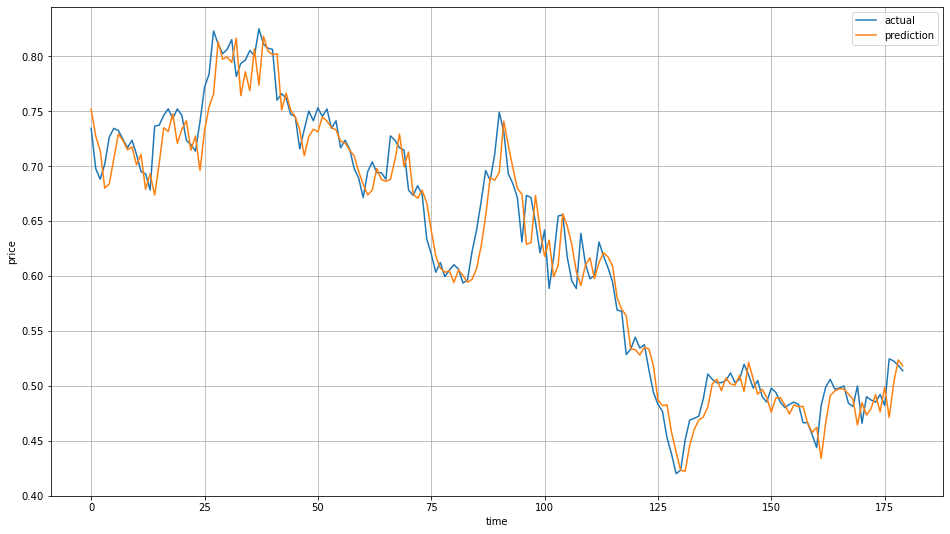

In [22]:
pred = model.predict(test_feature)

plt.figure(figsize = (16,9))
plt.xlabel("time")
plt.ylabel("price")
plt.plot(test_label, label="actual")
plt.plot(pred, label="prediction")
plt.grid()
plt.legend(loc="best")
plt.show()

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=False)
          )
model.add(Dense(1))

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [25]:
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stop])

Epoch 1/200
219/219 [==============================] - 11s 24ms/step - loss: 0.0148 - val_loss: 4.1892e-04
Epoch 2/200
219/219 [==============================] - 4s 18ms/step - loss: 3.8439e-04 - val_loss: 3.3067e-04
Epoch 3/200
219/219 [==============================] - 3s 16ms/step - loss: 3.2354e-04 - val_loss: 3.1339e-04
Epoch 4/200
219/219 [==============================] - 4s 16ms/step - loss: 3.0729e-04 - val_loss: 2.4529e-04
Epoch 5/200
219/219 [==============================] - 3s 15ms/step - loss: 2.5944e-04 - val_loss: 2.2273e-04
Epoch 6/200
219/219 [==============================] - 3s 13ms/step - loss: 2.4541e-04 - val_loss: 2.7974e-04
Epoch 7/200
219/219 [==============================] - 3s 15ms/step - loss: 2.2592e-04 - val_loss: 2.0642e-04
Epoch 8/200
219/219 [==============================] - 3s 13ms/step - loss: 2.0424e-04 - val_loss: 1.8894e-04
Epoch 9/200
219/219 [==============================] - 4s 16ms/step - loss: 2.1169e-04 - val_loss: 2.0260e-04
Epoch 10/200


6/6 [==============================] - 1s 4ms/step


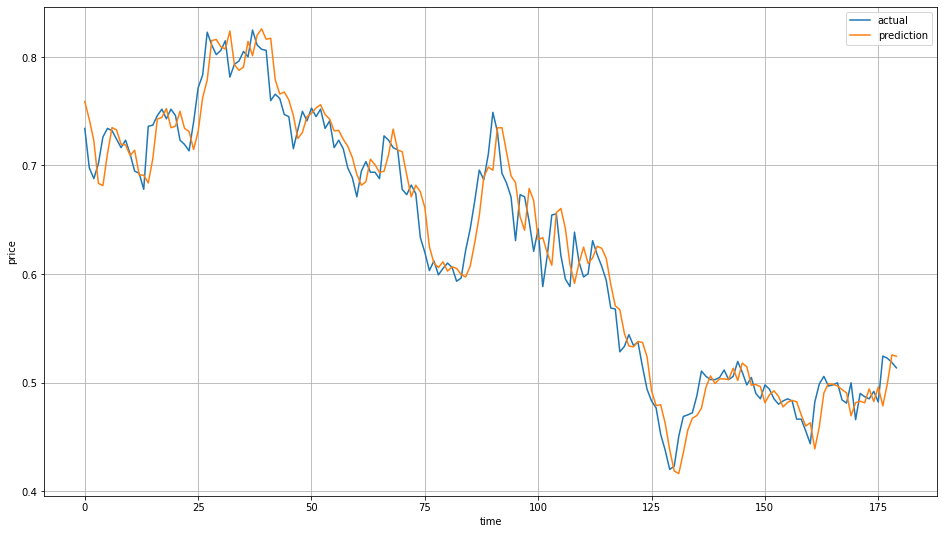

In [26]:
pred = model.predict(test_feature)

plt.figure(figsize = (16,9))
plt.xlabel("time")
plt.ylabel("price")
plt.plot(test_label, label="actual")
plt.plot(pred, label="prediction")
plt.grid()
plt.legend(loc="best")
plt.show()